## 数据导入
### 准备工作

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('ggplot')

### 读取文件、数据查看与描述

In [2]:
data = pd.read_csv('WorldIndex.csv')
data.head() # 查看前五行

,Country,Continent,Life_expectancy,GDP_per_capita,Population
0,Algeria,Africa,75.042537,4132.760292,39871528
1,Angola,Africa,52.666098,3695.793748,27859305
2,Benin,Africa,59.720707,783.947091,10575952
3,Botswana,Africa,64.487415,6532.060501,2209197
4,Burundi,Africa,57.107049,303.681022,10199270


In [3]:
data.info() # 查看数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          164 non-null    object 
 1   Continent        164 non-null    object 
 2   Life_expectancy  164 non-null    float64
 3   GDP_per_capita   164 non-null    float64
 4   Population       164 non-null    int64  
dtypes: float64(2), int64(1), object(2)
memory usage: 6.5+ KB


In [4]:
data.describe() # 数据描述

,Life_expectancy,GDP_per_capita,Population
count,164.000000,164.000000,1.640000e+02
mean,71.301273,12783.970324,4.253911e+07
std,8.511990,17966.848134,1.521931e+08
min,48.873951,303.681022,9.341900e+04
25%,65.340945,1690.241839,2.774335e+06
50%,73.650537,4961.785567,9.569478e+06
75%,77.133335,14536.831557,2.917300e+07
max,83.843659,101909.822300,1.371220e+09


## 数据处理
### 按大洲分组并计算出平均值

In [5]:
grp_con = data.groupby('Continent').mean().reset_index(None)
grp_con.Continent[3] = 'N.America'
grp_con.Continent[5] = 'S.America'
grp_con

<ipython-input-5-0e290a570693>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp_con.Continent[3] = 'N.America'
<ipython-input-5-0e290a570693>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grp_con.Continent[5] = 'S.America'


,Continent,Life_expectancy,GDP_per_capita,Population
0,Africa,61.341300,2355.184304,2.215478e+07
1,Asia,73.051239,12207.867942,1.200379e+08
2,Europe,78.682642,26541.416568,1.484819e+07
3,N.America,74.845576,13101.434295,2.985216e+07
4,Oceania,72.950995,13009.926059,3.405137e+06
5,S.America,74.051681,8165.852292,3.500085e+07


## 数据可视化

### 大洲和人口的关系
亚洲具有世界上人口数最多的国家，同时也是平均人口最多的大洲

其他大洲人口数较平均，且波动不是很大

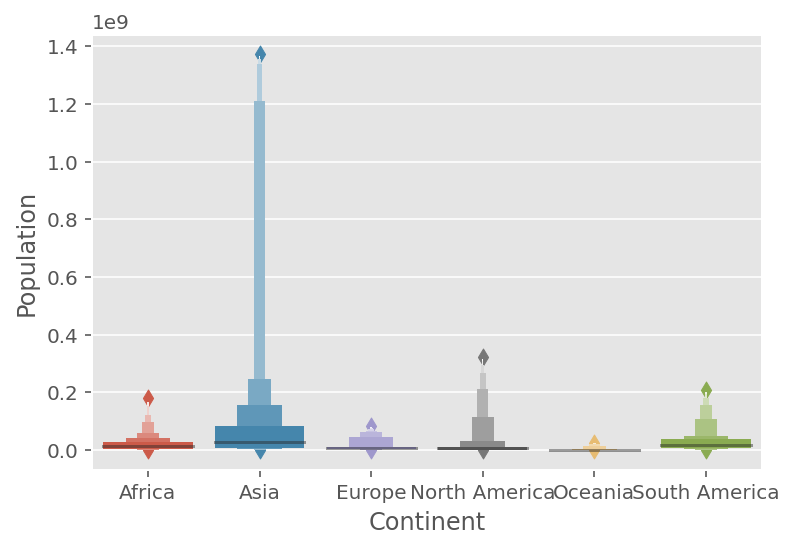

In [32]:
sns.boxenplot(data=data,x='Continent',y='Population')

### 大洲和GDP的关系
欧洲人均GDP最高，非洲最低，其余几个大洲相近

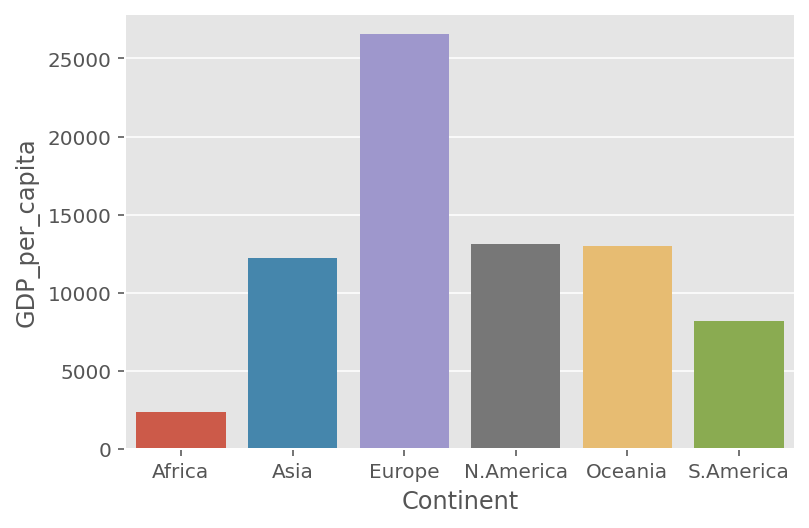

In [6]:
sns.barplot(data=grp_con,x='Continent',y='GDP_per_capita')

### 大洲和人均寿命的关系
欧洲人均寿命最高，非洲最低，其余几个大洲相近

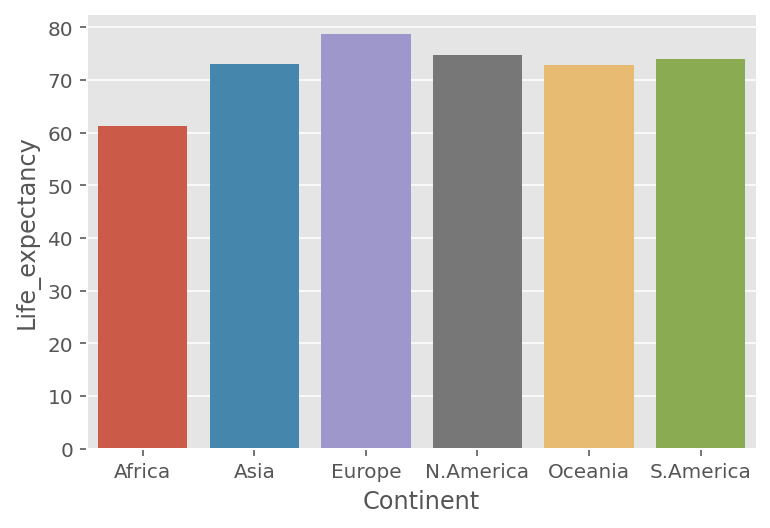

In [7]:
sns.barplot(data=grp_con,x='Continent',y='Life_expectancy')

### GDP和寿命散点图
从图中可得，人均GDP和寿命呈对数增长关系，寿命随着人均GDP的增长降低得越来越慢。

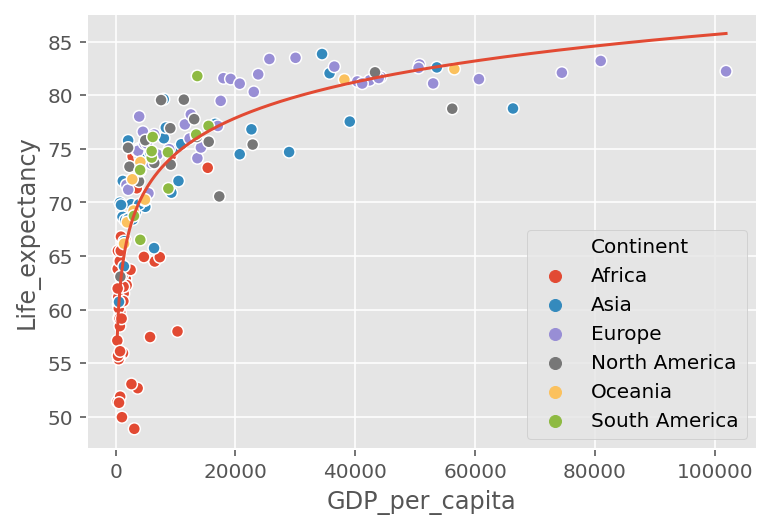

In [21]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * np.log(x) + b

gdp = data.GDP_per_capita
life = data.Life_expectancy
parameter = curve_fit(func, gdp, life)
sns.scatterplot(data=data,x='GDP_per_capita',y='Life_expectancy',hue='Continent')
arr = np.arange(np.min(gdp),np.max(gdp))
plt.plot(arr,func(arr,parameter[0][0],parameter[0][1]))

## 总结
综上所述，一个国家的GDP决定着这个国家的发展水平，且与人口总数无关。发展水平越高，人均寿命就越高。
